***importing model***

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***Importing dataset***

In [3]:
df=pd.read_csv('c:/Mayook/mobiles_Dataset.csv', encoding='ISO-8859-1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


***data studying***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

***converting Price values into INR***

In [5]:
# Define exchange rates manually (1 rupees in local currency = X INR)
exchange_rates = {
    'PKR': 0.31 ,  # 1 PKR = 0.31 INR
    'CNY': 11.93,    # 1 CNY = 11.93 INR
    'USD': 86.25,     # 1 USD = 86.25 INR
    'AED': 23.51,   # 1 AED = 23.51 INR
    'INR': 1.0, # 1 INR = 1 INR
    
}

columns_to_change = ['Launched Price (Pakistan)', 'Launched Price (India)',
                     'Launched Price (China)', 'Launched Price (USA)', 
                     'Launched Price (Dubai)']

# Convert to USD
for col in columns_to_change:
    df[col] = df[col].astype(str)  # Ensure string type
    df[col + ' (INR)'] = df[col].apply(
        lambda x: exchange_rates.get(x.split()[0], None) * float(x.split()[1].replace(',', '')) 
        if isinstance(x, str) and len(x.split()) == 2 and x.split()[0] in exchange_rates else None
    )
dataset= df.drop(columns=columns_to_change)

***Data cleaning***

In [6]:
dataset.dropna(inplace=True)

# Convert columns to string first, then remove units and convert to numbers

dataset['Mobile Weight'] = dataset['Mobile Weight'].astype(str).str.replace('g', '').astype(float)
dataset['RAM'] = dataset['RAM'].astype(str).str.split('/').str[0].str.extract(r'(\d+)').astype(float)
dataset['Front Camera'] = dataset['Front Camera'].astype(str).str.split('/').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
dataset['Back Camera'] = dataset['Back Camera'].astype(str).str.split('+').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
dataset['Battery Capacity'] = dataset['Battery Capacity'].astype(str).str.replace(',', '').str.replace('mAh', '').astype(float)
dataset['Screen Size'] = dataset['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
dataset.head(10)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) (INR),Launched Price (India) (INR),Launched Price (China) (INR),Launched Price (USA) (INR),Launched Price (Dubai) (INR)
0,Apple,iPhone 16 128GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,69749.69,79999.0,69182.07,68913.75,65804.49
1,Apple,iPhone 16 256GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,72849.69,84999.0,72761.07,73226.25,70506.49
2,Apple,iPhone 16 512GB,174.0,6.0,12.0,48.0,A17 Bionic,3600.0,6.1,2024,75949.69,89999.0,77533.07,77538.75,75208.49
3,Apple,iPhone 16 Plus 128GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,77499.69,89999.0,73954.07,77538.75,75208.49
4,Apple,iPhone 16 Plus 256GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,80599.69,94999.0,77533.07,81851.25,79910.49
5,Apple,iPhone 16 Plus 512GB,203.0,6.0,12.0,48.0,A17 Bionic,4200.0,6.7,2024,85249.69,104999.0,83498.07,86163.75,84612.49
6,Apple,iPhone 16 Pro 128GB,206.0,6.0,12.0,50.0,A17 Pro,4400.0,6.1,2024,88349.69,99999.0,83498.07,86163.75,82261.49
7,Apple,iPhone 16 Pro 256GB,206.0,8.0,12.0,50.0,A17 Pro,4400.0,6.1,2024,91449.69,104999.0,84691.07,90476.25,86963.49
8,Apple,iPhone 16 Pro 512GB,206.0,8.0,12.0,50.0,A17 Pro,4400.0,6.1,2024,97649.69,114999.0,89463.07,94788.75,91665.49
9,Apple,iPhone 16 Pro Max 128GB,221.0,6.0,12.0,48.0,A17 Pro,4500.0,6.7,2024,97649.69,109999.0,89463.07,94788.75,89314.49


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Name                     928 non-null    object 
 1   Model Name                       928 non-null    object 
 2   Mobile Weight                    928 non-null    float64
 3   RAM                              928 non-null    float64
 4   Front Camera                     928 non-null    float64
 5   Back Camera                      928 non-null    float64
 6   Processor                        928 non-null    object 
 7   Battery Capacity                 928 non-null    float64
 8   Screen Size                      928 non-null    float64
 9   Launched Year                    928 non-null    int64  
 10  Launched Price (Pakistan) (INR)  928 non-null    float64
 11  Launched Price (India) (INR)     928 non-null    float64
 12  Launched Price (China) (INR

In [8]:
dataset.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) (INR),Launched Price (India) (INR),Launched Price (China) (INR),Launched Price (USA) (INR),Launched Price (Dubai) (INR)
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,9.280000e+02,928.000000
mean,228.243966,7.774784,18.180603,46.757328,5027.512931,7.082683,2022.189655,38724.980862,50291.425647,45276.561164,5.368056e+04,51052.167672
std,105.544997,3.179277,11.993146,31.103036,1356.697382,1.535156,1.862194,31129.957426,40530.758139,32317.807945,1.162041e+05,36295.482373
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,2014.000000,4959.690000,5999.000000,5953.070000,6.813750e+03,7029.490000
25%,185.000000,6.000000,8.000000,15.250000,4440.000000,6.500000,2021.000000,17049.690000,19999.000000,20269.070000,2.156250e+04,23510.000000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,2023.000000,26349.845000,34999.000000,33404.000000,3.872625e+04,39379.250000
75%,208.000000,8.000000,32.000000,50.000000,5100.000000,6.780000,2024.000000,55799.690000,74900.000000,65603.070000,7.322625e+04,75208.490000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,2025.000000,170500.000000,274999.000000,214728.070000,3.417398e+06,260937.490000


In [9]:
dataset.median(numeric_only=True)

Mobile Weight                        194.000
RAM                                    8.000
Front Camera                          16.000
Back Camera                           50.000
Battery Capacity                    5000.000
Screen Size                            6.670
Launched Year                       2023.000
Launched Price (Pakistan) (INR)    26349.845
Launched Price (India) (INR)       34999.000
Launched Price (China) (INR)       33404.000
Launched Price (USA) (INR)         38726.250
Launched Price (Dubai) (INR)       39379.250
dtype: float64

***The Most Expensive Mobile model in india***

In [10]:
most_expensive = dataset.loc[dataset['Launched Price (India) (INR)'].idxmax()]
most_expensive

Company Name                              Huawei
Model Name                         Mate XT 512GB
Mobile Weight                              245.0
RAM                                         12.0
Front Camera                                13.0
Back Camera                                 50.0
Processor                             Kirin 9010
Battery Capacity                          5000.0
Screen Size                                 7.92
Launched Year                               2024
Launched Price (Pakistan) (INR)        120899.69
Launched Price (India) (INR)            274999.0
Launched Price (China) (INR)           172973.07
Launched Price (USA) (INR)             241413.75
Launched Price (Dubai) (INR)           260937.49
Name: 661, dtype: object

***The Least Expensive Mobile Model***

In [11]:
least_expensive = dataset.loc[dataset['Launched Price (India) (INR)'].idxmin()]
least_expensive

Company Name                                  Infinix
Model Name                              Smart HD 32GB
Mobile Weight                                   195.0
RAM                                               2.0
Front Camera                                      5.0
Back Camera                                       8.0
Processor                          MediaTek Helio A20
Battery Capacity                               5000.0
Screen Size                                       6.1
Launched Year                                    2020
Launched Price (Pakistan) (INR)               4959.69
Launched Price (India) (INR)                   5999.0
Launched Price (China) (INR)                  5953.07
Launched Price (USA) (INR)                    6813.75
Launched Price (Dubai) (INR)                  7029.49
Name: 796, dtype: object

***Price Trend Analysis Over Years***

In [12]:
avg_price_per_year = dataset.groupby("Launched Year")["Launched Price (India) (INR)"].mean()
avg_price_per_year

Launched Year
2014    13999.000000
2016    17095.400000
2017    40752.777778
2018    56640.619048
2019    50288.391304
2020    50209.623762
2021    42235.807339
2022    48878.026846
2023    51804.820652
2024    54295.510345
2025    37665.666667
Name: Launched Price (India) (INR), dtype: float64

___visualization___

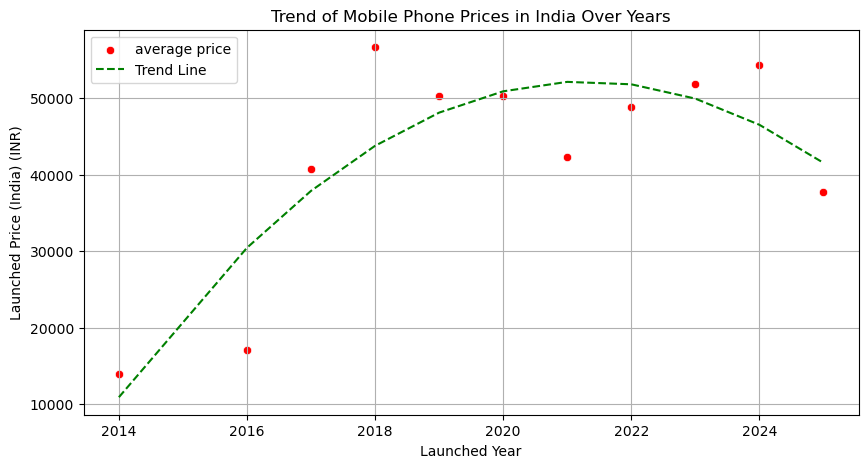

In [13]:
plt.figure(figsize=(10,5))

# Scatter plot of average prices
sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='red')

# Fit a polynomial trend line (degree=2)
z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)
p = np.poly1d(z)

# Plot trend line
plt.plot(avg_price_per_year.index, p(avg_price_per_year.index), 
         color='green', linestyle="--", label="Trend Line")

plt.title("Trend of Mobile Phone Prices in India Over Years")
plt.legend()
plt.grid(True)
plt.show()

- The mobile phone market shows a general upward trend in pricing.
- However, price fluctuations occur due to market competition, consumer demand, and technology shifts.

***Popularity of RAM & Camera Configurations***

In [14]:
ram=dataset['RAM'].mode()[0]
print("most common", ram)

most common 8.0


In [15]:
front_camera=dataset['Front Camera'].mode()[0]
print('most common front camera',front_camera,'MP')
back_camera=dataset['Back Camera'].mode()[0]
print('most common Back camera',back_camera,'MP')

most common front camera 16.0 MP
most common Back camera 50.0 MP


***Relationship between RAM and Price in India***

In [16]:
avg_price_per_ram = dataset.groupby('RAM')['Launched Price (India) (INR)'].mean()
print(avg_price_per_ram)

RAM
1.0      9832.333333
2.0      9830.833333
3.0     24912.911765
4.0     32539.191781
6.0     43944.344660
8.0     46436.432258
10.0    50999.000000
12.0    76693.209424
16.0    91515.129032
Name: Launched Price (India) (INR), dtype: float64


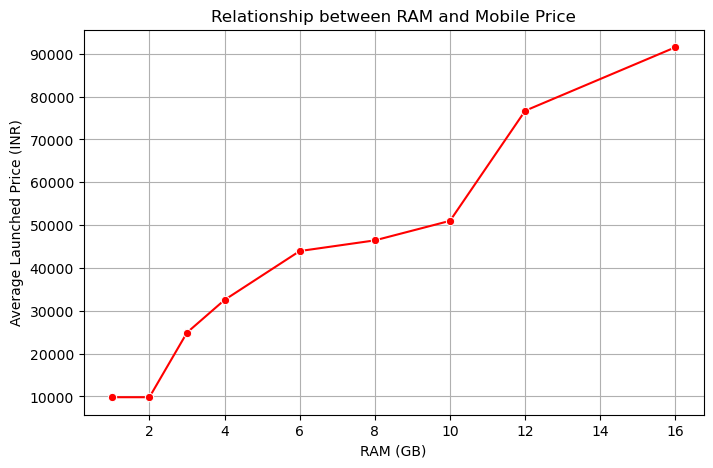

In [17]:
# Plotting RAM vs. Price
plt.figure(figsize=(8,5))
sns.lineplot(x=avg_price_per_ram.index,
             y=avg_price_per_ram,
             marker='o', color='red')

plt.xlabel("RAM (GB)")
plt.ylabel("Average Launched Price (INR)")
plt.title("Relationship between RAM and Mobile Price")
plt.grid(True)
plt.show()

- The average price of mobile phones increases with RAM, indicating a positive correlation between RAM size and price.

***Price Variations Across Countries***

In [18]:
avg_price_by_country = dataset[
    ["Launched Price (Pakistan) (INR)", 
     "Launched Price (India) (INR)", 
     "Launched Price (China) (INR)", 
     "Launched Price (USA) (INR)", 
     "Launched Price (Dubai) (INR)"]
].mean().sort_values(ascending=False)
avg_price_by_country

Launched Price (USA) (INR)         53680.555684
Launched Price (Dubai) (INR)       51052.167672
Launched Price (India) (INR)       50291.425647
Launched Price (China) (INR)       45276.561164
Launched Price (Pakistan) (INR)    38724.980862
dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10288\3602489277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")


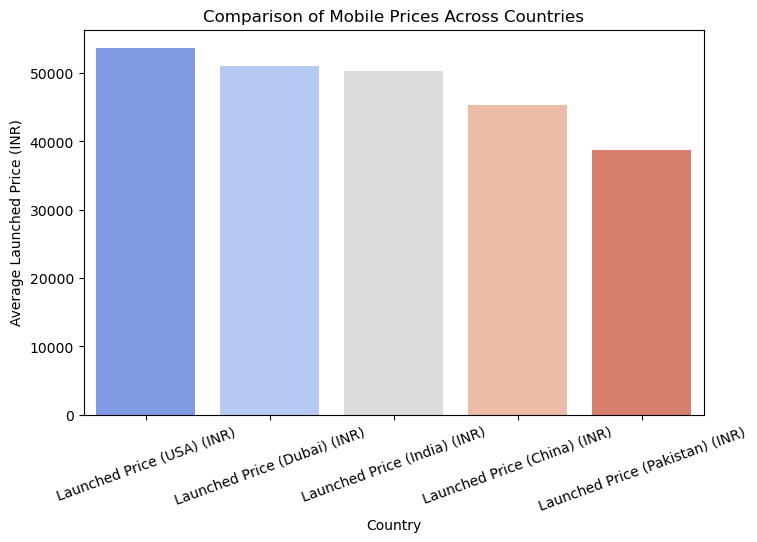

In [19]:
# Plot the average prices
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_country.index, y=avg_price_by_country.values, palette="coolwarm")

plt.xlabel("Country")
plt.ylabel("Average Launched Price (INR)")
plt.title("Comparison of Mobile Prices Across Countries")
plt.xticks(rotation=20)
plt.show()

- USA has the highest prices (622) due to taxes and premium branding.
- India (603) and Dubai (586) are slightly cheaper but still relatively high.
- China (531) has lower prices due to local manufacturing.
- Pakistan ($450) has the lowest prices as brands focus on affordability

In [20]:
company_avg_price = df.groupby("Company Name")[
    ["Launched Price (Pakistan) (INR)", 
     "Launched Price (India) (INR)", 
     "Launched Price (China) (INR)", 
     "Launched Price (USA) (INR)", 
     "Launched Price (Dubai) (INR)"]
].mean()
company_avg_price

,Launched Price (Pakistan) (INR),Launched Price (India) (INR),Launched Price (China) (INR),Launched Price (USA) (INR),Launched Price (Dubai) (INR)
Company Name,,,,,
Apple,76764.638454,102998.597938,85676.463402,88706.791237,86599.933299
Google,53437.785238,70332.333333,72306.593810,65135.178571,71066.251905
Honor,37254.195495,48850.648352,40196.102967,52403.035714,52744.814176
Huawei,56895.776190,102798.571429,81873.033571,96304.285714,98046.775714
Infinix,13612.011429,17320.428571,18628.695000,21137.410714,21408.373929
Lenovo,19529.690000,25392.400000,25119.808000,26881.250000,27561.556667
Motorola,28389.690000,33692.548387,32237.553871,37368.508065,37743.788226
Nokia,16063.354545,13771.727273,13817.109091,324315.681818,15516.600000
OnePlus,41791.211132,45734.849057,47122.824717,52493.702830,57731.244717


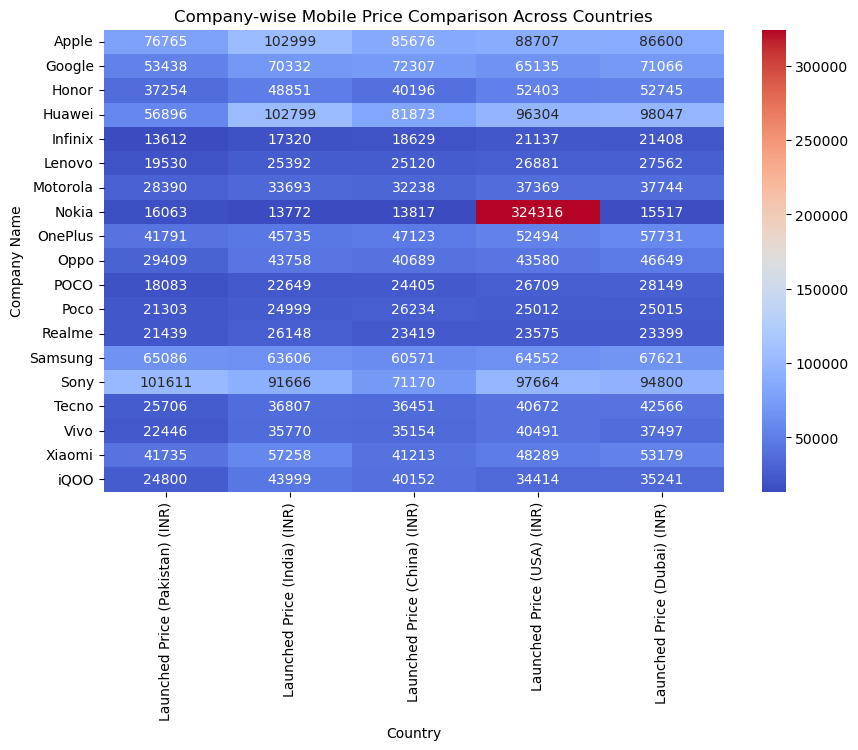

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(company_avg_price, annot=True, fmt=".0f", cmap="coolwarm")

plt.title("Company-wise Mobile Price Comparison Across Countries")
plt.xlabel("Country")
plt.ylabel("Company Name")
plt.show()

- Nokia has a significant outlier in the USA (3760), much higher than other regions. This may be a data entry issue or an extreme pricing case.
- Apple, Sony, and Huawei have the highest prices across all regions.
- Pakistan generally has the lowest prices, while India and the USA have higher prices.
- Budget brands like Infinix, Tecno, and Lenovo have consistently low prices across all countries.

***Brand Market share & Pricing strategy***

In [22]:
mobile_counts = dataset['Company Name'].value_counts().sort_values(ascending=False)
mobile_counts

Company Name
Oppo        129
Apple        97
Honor        91
Vivo         86
Samsung      86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10288\2300419836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')


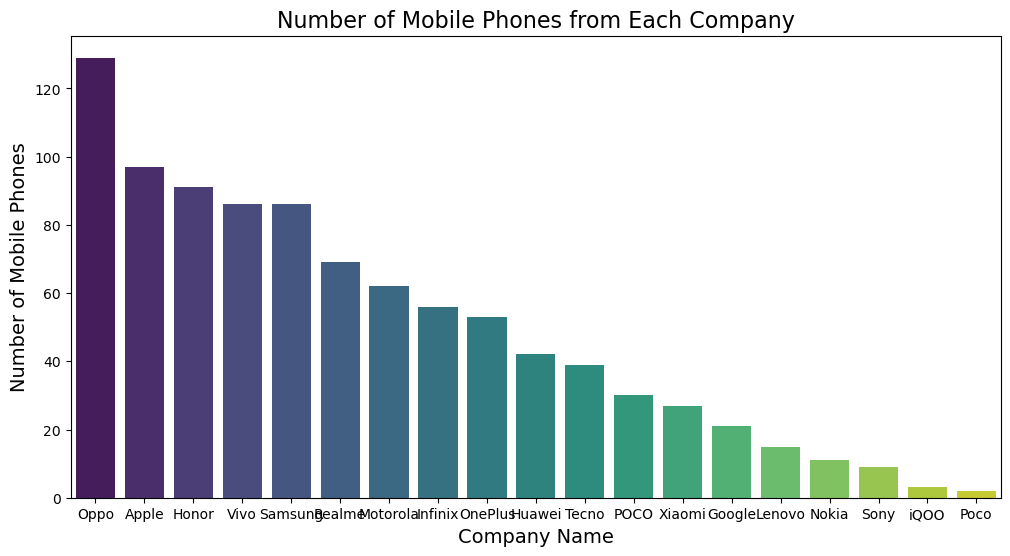

In [23]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x=mobile_counts.index, y=mobile_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Mobile Phones', fontsize=14)
plt.title('Number of Mobile Phones from Each Company', fontsize=16)
plt.xticks(rotation=0) 
plt.show()


- Oppo, Apple, and Honor lead in the number of models.
- Xiaomi has fewer models than expected, possibly due to a refined strategy.
- Google, Lenovo, and Nokia remain niche players focusing on specific segments.

***Pricing strategy in india***

In [24]:
brand_pricing_india=dataset.groupby("Company Name")["Launched Price (India) (INR)"].describe()
brand_pricing_india = brand_pricing_india.sort_values(by="mean", ascending=False)
brand_pricing_india = brand_pricing_india.reset_index()
brand_pricing_india

,Company Name,count,mean,std,min,25%,50%,75%,max
0,Apple,97.0,102998.597938,29509.851082,29900.0,84900.00,99999.0,119999.00,199900.0
1,Huawei,42.0,102798.571429,67269.647806,34999.0,54999.00,84999.0,119999.00,274999.0
2,Sony,9.0,91665.666667,30720.514319,49999.0,59999.00,94999.0,119999.00,129999.0
3,Google,21.0,70332.333333,35896.146497,31999.0,44999.00,59999.0,79999.00,179999.0
4,Samsung,86.0,60828.906977,42917.350282,8499.0,19992.25,62499.0,93674.75,176999.0
5,Xiaomi,27.0,57258.259259,32438.809369,14999.0,26499.00,69999.0,84999.00,109999.0
6,Honor,91.0,48850.648352,37278.046452,10999.0,21999.00,34999.0,64999.00,159999.0
7,OnePlus,53.0,45734.849057,19597.047407,12999.0,27999.00,44999.0,59999.00,74999.0
8,iQOO,3.0,43999.000000,6000.000000,37999.0,40999.00,43999.0,46999.00,49999.0
9,Oppo,129.0,43758.449612,29549.106084,8999.0,21999.00,36999.0,49999.00,159999.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10288\357617292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="viridis")


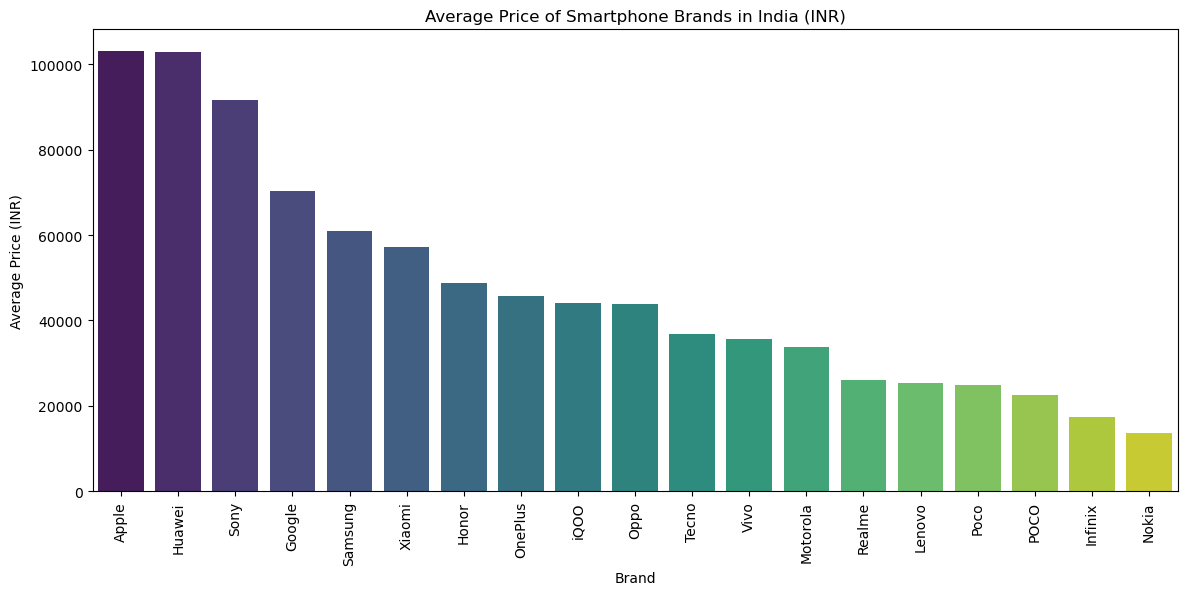

In [25]:
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="viridis")
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.title("Average Price of Smartphone Brands in India (INR)")
plt.xlabel("Brand")
plt.ylabel("Average Price (INR)")
plt.show()



- Apple, Huawei, and Sony cater to premium buyers, so their marketing likely targets professionals and tech enthusiasts.
- Xiaomi, OnePlus, and Oppo provide value-for-money alternatives, attracting younger and tech-savvy consumers.
- Infinix & Nokia focus on affordability, making them appealing for first-time smartphone users or those in price-sensitive markets.